#### Homework3
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. 

Q1 (30 points) Hyper-parameter Tuning: Provide your coding for this exercise. Your code should run without error and the output should be correct based on your assumptions. 
---
- Create a dummy dataset with 3 input features (X) and a numeric output variable (y). Your daatset should have 300 data points. The train:test split is 75:25. 
- Standardize the input features. 
- Construct a 3-layer neural network with 2 neurons in the hidden layer and one neuron in the output layer. Use Relu as the activation function in the hidden layer. Use Sigmoid as the activation function in the output layer. 
- At this step, you are to use grid search to perform hyper-parameter tuning based on regularization and regularization parameter, momentum term, and batch size. For each parameter, try 2 different values. Refer to "lec11-grid-search.ipynb" as a reference. You are not allowed to copy-paste the code to solve this assignment. Just use it to learn what to do. Use SGD as your optimization technique. 
- In your code, report which subset of hyper-parameters give the best model. Then using the best hyper-parameters that you reported, visualize the MSE loss on train and test data over multiple epochs (the number of epochs depends on model convergence). 

Note: Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code.

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [22]:
import numpy as np
print(np.__version__)
print(tf.__version__)


1.26.4
2.17.1


In [20]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

np.random.seed(42)
X = np.random.rand(300, 3)  # 300 data points with 3 features
y = np.random.rand(300, 1)  # Numeric output variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define a function to build the neural network model
def build_model(reg_param, momentum):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_param)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.SGD(momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

reg_params = [0.01, 0.001]
momentums = [0.8, 0.9]
batch_sizes = [16, 32]

# Grid search
best_model = None
best_params = None
best_loss = float('inf')
results = []
for reg_param, momentum, batch_size in product(reg_params, momentums, batch_sizes):
    model = build_model(reg_param, momentum)
    # Save the history object returned by model.fit
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=batch_size,
        verbose=0
    )
    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)[0]
    results.append((reg_param, momentum, batch_size, loss))
    if loss < best_loss:
        best_loss = loss
        best_params = (reg_param, momentum, batch_size)
        best_model = model
        # Save the history of the best model
        best_history = history


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])
 best regularization parameter: 0.01 | best momentum: 0.9 | best batch size: 16


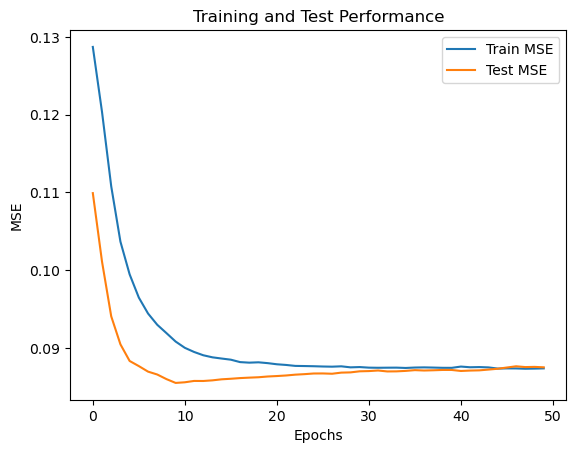

In [26]:
print(best_history.history.keys()) 
print(f" best regularization parameter: {best_params[0]} | best momentum: {best_params[1]} | best batch size: {best_params[2]}")
plt.plot(best_history.history['mse'], label='Train MSE')
plt.plot(best_history.history['val_mse'], label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Test Performance')
plt.show()


Q2- (30 points) Given the information below, use Naïve Bayes to determine whether File 6 belongs to class label "Spam" or "Ham" given its features. Answering following questions clearly and accurately. Provide your computational work. 
---


![Generated Dataset](tbl1.jpg)


- What are the prior probabilities P(Spam), P(Ham)?

    P(Spam) = 2/5 or 40%, P(Ham) = 3/5 or 60%

- Compute the required conditional probabilitues corresponding to the parameters of the model by filling the table below.


![Generated Dataset](tbl2.png)


- What is the probability of File 6 being a Spam? What is the probability of File 6 being a Ham? What can you conclude about the category of File 6? Justify your answer.



We will use naive bayes to calculate this:

Probability of being spam:
$$
  P(Spam | Price, Tax, Free) = \frac{P(Price, Tax, Free | Spam) * P(S)}{P(Price, Tax, Free)}
$$

$$
  P(Spam | Price, Tax, Free) = \frac{ 0.5 * 0.5 * 0.5 * 0.4}{P(Price, Tax, Free)}
$$
$$
  P(Spam | Price, Tax, Free) = \frac{ 0.05 }{P(Price, Tax, Free)}
$$
$$
  P(Spam | Price, Tax, Free)    \alpha   0.05 
$$

Probability of being ham:
$$
  P(Ham | Price, Tax, Free) = \frac{P(Price, Tax, Free | Ham) * P(H)}{P(Price, Tax, Free)}
$$

$$
  P(Ham | Price, Tax, Free) = \frac{ 1 * 2/3 * 1/3 * 0.6}{P(Price, Tax, Free)}
$$
$$
  P(Ham | Price, Tax, Free) = \frac{ 0.1333}{P(Price, Tax, Free)}
$$
$$
  P(Ham | Price, Tax, Free)   \alpha    0.1333
$$

Normalizing those results, we'd get ~ 

$P(Spam | Price, Tax, Free) = \frac{0.05}{0.05 + 0.1333} = 0.273$

$ P(Ham | Price, Tax, Free) = \frac{0.1333}{0.05 + 0.1333} = 0.727$

So, the message is more likely to be ham.


Q3- (6 points) A patient with a positive test wants to know how probable it is to have flu. Find the probability given the information below and provide your computational work. 
Prior probability: P(not flu)=0.15
Likelihood: P(positive│ flu)=0.85
Evidence: P(negative)=0.25
---
From Bayes Theorem:
$$
P(flu | positive) = \frac{P (positive | flu) * P(flu)}{P(positive)}
$$
From basic probability, we konw that $P(flu) = 1 - P(not flu) = 1 - 0.15 = 0.85$ and $P(positive) = 1 - P(negative) = 1 - 0.25 = 0.75$

Then, plugging those values in:
$$
P(flu | positive) = \frac{0.85 * 0.85}{0.75} = 0.96333...
$$

Giving us a 96.33% change of having flu... rip.




Q4- (8 points) Imagine you are tasked with developing a binary classification model to classify emails as either "spam" or "not spam" based on their content. The observations in the dataset cover several aspects listed in the following table: 
---


![Generated Dataset](tbl3.jpg)

You have two different approaches in mind: Naive Bayes classification and Bayesian networks. Answer the following question in the context of this email classification (as “spam” or “not spam”): 
Discuss the assumptions in Naïve Bayes and Bayesian Network algorithms, as well as advantages and disadvantages of using Naïve Bayes and Bayesian Network classification. Your answer should address the following points: 
-	What aspects of the problem make Naïve Bayes classification suitable or unsuitable? 
-	Similarly, analyze the suitability of using Bayesian networks for the email classification problem and indicate what unique characteristics of Bayesian networks make them a potentially good or bad choice for this task? 
-	Discuss these methods in terms of their computational efficiency and classification accuracy, considering the features listed in the above table. 
Include your answer in a table with the following layout:


![Generated Dataset](tbl4.png)


Q5- (6 points) Given the following probability table, build a Naïve Bayes classifier using the Discriminant function. Can this classifier accurately predict if a patient is healthy/not-healthy based on the Test results? (e.g., can a positive test result indicate with high confidence that a patient has flu? How about a negative test result?) Show your mathematical work with proper explanation. Please note that P(Healthy) = 0.25. 
---
![Generated Dataset](tbl5.jpg)

P(Has-Flu) = 1 - P(Healthy) = 1 - 0.25 = 0.75

P(Positive | Has-Flu) = 0.8

P(Negative | Has-Flu) = 0.2

P(Positive | Healthy) = 0.1

P(Negative | Healthy) = 0.9



Discriminant Function for Positive Test Result: 
$log \frac{P(Positive | Has-Flu) * P(Has-Flu)}{P(Positive | Healthy) * P(Healthy)}$

$ = log(\frac{0.8 * 0.75}{0.1 * 0.25}) = 1.38$

Discriminant function is *positive*, so the result is mostly likely in class 1, or the "Has-Flu" class.


Discriminant Function for Negative Test Result: 
$log \frac{P(Negative | Has-Flu) * P(Has-Flu)}{P(Negative | Healthy) * P(Healthy)}$

$ = log(\frac{0.2 * 0.75}{0.9 * 0.25}) = -0.176$

Discriminant function is *negative*, but not by as much as the first--  so the result is slightly more likely to be in class 2, or the "healthy" class.



Q6-(Optional Question- 8 extra points based on the completeness of the answer) Based on the optional document "Lec12-MultivariateDistributions.pdf", describe how conditional probabilities are computed in training a Bayesian Network model when the random variables are continuous. Provide an example. 
---

When the random variables are continuous, you would use a probability density function (PDF) rather than discrete probabilities in a conditional probaiblity table, for which we can assume a (usually Gaussian) distribution. Thus, the joint probabilities would be the product of these continuous conditional probabilities. The correlation matrix captures the dependencies(covariances between variables) and variances (on the diagonal) of each variable, and Cholesky decomposition is used to efficiently compute conditional probabilities.  